<a href="https://colab.research.google.com/github/isakbot/simm71/blob/main/ModelAnnounce_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cca-cce/osm-cca/blob/main/jnb/simm71/nlp2_lab.ipynb)


# Research question

**Exploring Sustainability vs. Greenwashing Communication Through LDA Topic Modeling**

Sustainability communication has become a central element of organizational branding, especially as businesses strive to position themselves as environmentally responsible. However, this communication can range from genuine sustainability efforts to strategies of "greenwashing," where sustainability claims are exaggerated or misleading. Latent Dirichlet Allocation (LDA) topic modeling provides a powerful method for analyzing large-scale textual data, uncovering latent themes, and distinguishing between genuine sustainability-focused discourse and potentially superficial claims.

In this study, we apply LDA topic modeling to sustainability communication from two contrasting organizations: **Preem**, a company rooted in fossil fuel production, and **Vattenfall**, which focuses on renewable energy. These organizations operate at opposite ends of the sustainability spectrum, offering a unique opportunity to explore how their communication aligns with their operational realities.

### **Potential Insights from Topic Modeling**

1. **Identifying Key Themes:**
   - For **Vattenfall**, we might expect topics related to renewable energy technologies (e.g., wind, solar, hydropower), carbon neutrality initiatives, and innovation in sustainable infrastructure.
   - For **Preem**, topics might focus on carbon offsets, efficiency improvements in fossil fuel use, or vague terms like "energy transition" that could indicate greenwashing.

2. **Assessing Depth of Communication:**
   - True sustainability communication tends to feature specific, actionable topics such as project details, quantifiable targets, or transparent reporting.
   - Greenwashing communication often revolves around abstract and promotional language, with topics like "commitment to the environment" or "sustainable development" lacking concrete substance.

3. **Comparing Organizational Focus:**
   - Vattenfall's communication might emphasize leadership in renewable energy and tangible sustainability impacts.
   - Preem’s communication may emphasize mitigation efforts, partnerships, or aspirational future goals, potentially signaling a defensive greenwashing strategy.

### **Expected Differences in Topics**

Given the inherent differences in the business models:
- **Vattenfall's Topics:** Likely to reflect operational alignment with sustainability, focusing on renewables, innovation, carbon reduction targets, and societal impact.
- **Preem's Topics:** May reveal a focus on narratives of transition, reliance on offset mechanisms, or less tangible commitments, which could indicate strategic greenwashing.

By comparing the coherence, specificity, and frequency of topics across the two organizations, we can assess the extent to which their sustainability communication reflects genuine commitment versus rhetorical positioning. This analysis provides a lens for critically evaluating the alignment between communication and organizational practices, offering insights into the dynamics of sustainability discourse in contrasting corporate contexts.

# Download plain text data

In [ ]:
# https://drive.google.com/file/d/1XA0DCHZt2H1wE3MCLtOQAGTiApBPJC47/view?usp=sharing
!rm -rf *.zip 2>/dev/null
!gdown https://drive.google.com/uc?id=1XA0DCHZt2H1wE3MCLtOQAGTiApBPJC47
!unzip -q *.zip 2>/dev/null

Downloading...
From: https://drive.google.com/uc?id=1XA0DCHZt2H1wE3MCLtOQAGTiApBPJC47
To: /content/drive-download-20241209T101716Z-001.zip
100% 25.9k/25.9k [00:00<00:00, 60.6MB/s]


This sequence of commands in a Jupyter Notebook performs file cleanup, downloads a file from Google Drive, and prepares a directory for use. The first command, `!rm -rf osm-cca-* 2>/dev/null`, forcefully removes any existing directories or files matching the pattern `osm-cca-*` while suppressing error messages if they don’t exist. The second command, `!gdown https://drive.google.com/uc?id=1K9akKM0c6ZXTFNdCcZpqimrIqdWKdI0u`, downloads the file specified by the Google Drive URL using the `gdown` tool. The third command, `!unzip -q osm-cca-nlp-main.zip && mv osm-cca-nlp-main osm-cca-nlp`, extracts the downloaded ZIP file in quiet mode and renames the resulting directory from `osm-cca-nlp-main` to `osm-cca-nlp`. Together, these commands ensure a fresh, prepared directory for subsequent operations in the notebook.

# Read plain text to Pandas Dataframe

In [ ]:
import os
import pandas as pd
import re
import string

# Directories containing the text files
directories = ['/content/osm-cca-nlp/res/pdf/preem', '/content/osm-cca-nlp/res/pdf/vattenfall']
directories = ['org1-preem', 'org2-vattenfall']

data = []
text_index = 1

# Allowed characters: alphabetic, punctuation, and whitespace
allowed_chars = set(string.ascii_letters + string.punctuation + string.whitespace)

for directory in directories:
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.txt'):
                file_path = os.path.join(root, file)
                folder_name = os.path.basename(root)

                with open(file_path, 'r', encoding='utf-8') as f:
                    raw_text = f.read()

                # Keep only allowed characters
                clean_text = ''.join(c for c in raw_text if c in allowed_chars)

                # Replace sequences of whitespace with a single space
                clean_text = re.sub(r'\s+', ' ', clean_text)

                # Trim leading and trailing whitespace
                clean_text = clean_text.strip()

                data.append({
                    'text_index': text_index,
                    'file_path': file_path,
                    'folder_name': folder_name,
                    'raw_text': raw_text,
                    'clean_text': clean_text
                })

                text_index += 1

# Create DataFrame
df_texts = pd.DataFrame(data, columns=['text_index', 'file_path', 'folder_name', 'raw_text', 'clean_text'])

# Save DataFrame to TSV file
df_texts.to_csv('df_texts.tsv', sep='\t', index=False)


**Importing Additional Libraries**

The code imports `pandas` for data manipulation, `re` for regular expressions, and `string` for accessing string constants. These libraries provide functionalities for data storage, text processing, and character handling.

---

**Initializing Data Structures**

An empty list named `data` is initialized to store dictionaries of processed text information. A variable `text_index` is set to `1` to assign a unique numerical index to each text file processed.

---

**Defining Allowed Characters**

A set called `allowed_chars` is created containing all alphabetic characters, punctuation marks, and whitespace characters. This set is used to filter out unwanted characters from the text content.

---

**Processing Text Files**

The code iterates through the directories, searching for files that end with `.txt`. For each text file found, it performs the following steps:

---

**Reading Raw Text**

The text file is opened using UTF-8 encoding, and its content is read into the variable `raw_text`. This variable holds the original text extracted from the file.

---

**Cleaning Text Content**

1. **Filtering Allowed Characters:** The code constructs `clean_text` by including only characters present in `allowed_chars`, effectively removing any non-alphabetic, non-punctuation, and non-whitespace characters.

2. **Normalizing Whitespace:** It uses a regular expression to replace multiple whitespace characters (`\s+`) with a single space, ensuring consistent spacing in the text.

3. **Trimming Whitespace:** Leading and trailing whitespace are removed from `clean_text` using the `strip()` method.

---

**Collecting Processed Data**

A dictionary containing the following keys is appended to the `data` list:
- `'text_index'`: The unique index number for the text file.
- `'file_path'`: The full path to the text file.
- `'folder_name'`: The name of the folder containing the file.
- `'raw_text'`: The original text content from the file.
- `'clean_text'`: The cleaned and processed text content.

After appending, `text_index` is incremented to prepare for the next file.

---

**Creating a DataFrame**

The list `data` is converted into a pandas DataFrame named `df_texts`. The DataFrame includes the specified columns: `'text_index'`, `'file_path'`, `'folder_name'`, `'raw_text'`, and `'clean_text'`.

---

**Saving DataFrame to TSV File**

The DataFrame `df_texts` is saved to a TSV (Tab-Separated Values) file named `'df_texts.tsv'`. The `index=False` parameter ensures that the DataFrame's index is not written to the file, keeping the output clean.

---

In [ ]:
# for more languages, check https://spacy.io/models
!python -m spacy download en_core_web_md >/dev/null 2>&1


The provided code downloads the medium-sized English language model (**`en_core_web_md`**) from spaCy's pre-trained model repository. This model includes comprehensive features such as part-of-speech tagging, named entity recognition, and word vector representations, making it suitable for tasks requiring semantic understanding and context-based analysis. The `2>/dev/null` part redirects any error messages during the download process to `/dev/null`, effectively silencing them. For information about other languages or models, users can refer to the [spaCy models documentation](https://spacy.io/models).

# Split text into sentences

In [ ]:
import pandas as pd
import re
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_md')

data = []

for idx, row in df_texts.iterrows():
    text_index = row['text_index']
    folder_name = row['folder_name']
    clean_text = row['clean_text']

    # Process the clean text to identify sentences
    doc = nlp(clean_text)

    sentence_index = 1
    for sent in doc.sents:
        sentence_text = sent.text

        # Squeeze, trim, and convert sequences of whitespace to single spaces
        #sentence_text = re.sub(r'\s+', ' ', sentence_text).strip()

        # Check if the sentence exceeds five words
        if len(sentence_text.split()) > 5:
            data.append({
                'text_index': text_index,
                'folder_name': folder_name,
                'sentence_index': sentence_index,
                'sentence_text': sentence_text
            })
            sentence_index += 1

# Create the DataFrame
df_sentences = pd.DataFrame(data, columns=['text_index', 'folder_name', 'sentence_index', 'sentence_text'])

# Save the DataFrame to a TSV file
df_sentences.to_csv('df_sentences.tsv', sep='\t', index=False)


**Iterating Over Cleaned Text Data**

The code begins by iterating over each row in the `df_texts` DataFrame using `df_texts.iterrows()`. For every entry, it extracts the `text_index`, `folder_name`, and `clean_text` fields. This setup allows the script to process each cleaned text from the dataset individually.

---

**Processing Text with spaCy to Identify Sentences**

For each `clean_text`, the code applies the spaCy English language model to create a `doc` object:
```python
doc = nlp(clean_text)
```
This object contains linguistic annotations, enabling the extraction of sentences (`doc.sents`) from the text.

---

**Extracting and Cleaning Sentences**

The script initializes a `sentence_index` to keep track of sentence positions. It then iterates over each sentence in `doc.sents`. For every sentence, it retrieves the sentence text using `sent.text` and performs cleaning operations:
- **Normalizing Whitespace:** Uses a regular expression to replace multiple whitespace characters with a single space:
  ```python
  sentence_text = re.sub(r'\s+', ' ', sentence_text).strip()
  ```
- **Trimming:** Removes leading and trailing whitespace with `.strip()`.

---

**Filtering Sentences by Word Count**

Before including a sentence in the dataset, the code checks if it contains more than five words:
```python
if len(sentence_text.split()) > 5:
```
This condition filters out short sentences that may not be informative, ensuring that only substantial sentences are included in the analysis.

---

**Collecting Processed Sentence Data**

If a sentence meets the word count criterion, the code appends a dictionary to the `data` list containing:
- `'text_index'`: The identifier of the original text from which the sentence was extracted.
- `'folder_name'`: The name of the folder containing the source text.
- `'sentence_index'`: A sequential number indicating the sentence's order within the text.
- `'sentence_text'`: The cleaned and processed sentence text.

After appending, the `sentence_index` is incremented to prepare for the next sentence.

---

# Split sentences into tokens

In [ ]:
import pandas as pd
import spacy
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load the spaCy English model
nlp = spacy.load('en_core_web_md')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

data = []

for idx, row in df_sentences.iterrows():
    text_index = row['text_index']
    folder_name = row['folder_name']
    sentence_index = row['sentence_index']
    sentence_text = row['sentence_text']

    doc = nlp(sentence_text)

    token_index = 1
    for token in doc:
        # Exclude tokens that:
        # - Are not alphabetic
        # - Are stopwords
        # - Are out-of-vocabulary (OOV)
        # and token.has_vector, only available in medium spacy model
        if (
            token.is_alpha and
            token.text.lower() not in stop_words and
            not token.is_oov and token.has_vector
        ):
            token_text = token.text
            token_lemma = token.lemma_
            token_pos = token.pos_
            token_entity = token.ent_type_ if token.ent_type_ else 'O'  # 'O' for no entity

            data.append({
                'text_index': text_index,
                'folder_name': folder_name,
                'sentence_index': sentence_index,
                'token_index': token_index,
                'token_text': token_text,
                'token_lemma': token_lemma,
                'token_pos': token_pos,
                'token_entity': token_entity
            })

            token_index += 1

# Create the DataFrame
df_tokens = pd.DataFrame(data, columns=[
    'text_index', 'folder_name', 'sentence_index',
    'token_index', 'token_text', 'token_lemma', 'token_pos', 'token_entity'
])

# Save the DataFrame to a TSV file
df_tokens.to_csv('df_tokens.tsv', sep='\t', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Code Steps with Titles and Explanations

1. **Initialize NLTK Stopwords**
   - **Code:**  
     ```python
     nltk.download('stopwords')
     ```
   - **Explanation:**  
     Downloads the NLTK English stopwords list if not already downloaded, ensuring the script can filter out common words like "the," "and," and "is" that are typically not useful in text analysis.

2. **Load spaCy English Language Model**
   - **Code:**  
     ```python
     nlp = spacy.load('en_core_web_md')
     ```
   - **Explanation:**  
     Loads the medium-sized spaCy English model, which includes capabilities for part-of-speech tagging, named entity recognition, lemmatization, and word vectors. The medium model is used because it supports word vectors (`has_vector`) and OOV detection (`is_oov`).

3. **Prepare NLTK Stopwords Set**
   - **Code:**  
     ```python
     stop_words = set(stopwords.words('english'))
     ```
   - **Explanation:**  
     Converts the NLTK stopwords list into a set for fast membership checking. This set is later used to exclude stopwords during token filtering.

4. **Iterate Over Sentences**
   - **Code:**  
     ```python
     for idx, row in df_sentences.iterrows():
         text_index = row['text_index']
         folder_name = row['folder_name']
         sentence_index = row['sentence_index']
         sentence_text = row['sentence_text']
         doc = nlp(sentence_text)
     ```
   - **Explanation:**  
     Iterates over rows in the `df_sentences` dataframe, extracting metadata (e.g., `text_index`, `folder_name`, `sentence_index`) and processing each sentence text with spaCy's NLP pipeline to produce a tokenized `doc` object.

5. **Filter and Process Tokens**
   - **Code:**  
     ```python
     for token in doc:
         if (
             token.is_alpha and
             token.text.lower() not in stop_words and
             not token.is_oov and token.has_vector
         ):
             ...
     ```
   - **Explanation:**  
     For each token in the processed sentence:
     - Keeps only alphabetic tokens (`is_alpha`).
     - Excludes stopwords using the NLTK stopwords set.
     - Ensures tokens are in-vocabulary (`not token.is_oov`) and have a vector representation (`token.has_vector`).
     - Collects token metadata (text, lemma, part of speech, and entity type) for valid tokens.

6. **Append Token Metadata**
   - **Code:**  
     ```python
     data.append({
         'text_index': text_index,
         'folder_name': folder_name,
         'sentence_index': sentence_index,
         'token_index': token_index,
         'token_text': token_text,
         'token_lemma': token_lemma,
         'token_pos': token_pos,
         'token_entity': token_entity
     })
     token_index += 1
     ```
   - **Explanation:**  
     Appends metadata about each valid token (e.g., text, lemma, POS tag, and entity type) to the `data` list, preserving sentence and document-level context.

7. **Create Token DataFrame**
   - **Code:**  
     ```python
     df_tokens = pd.DataFrame(data, columns=[
         'text_index', 'folder_name', 'sentence_index',
         'token_index', 'token_text', 'token_lemma', 'token_pos', 'token_entity'
     ])
     ```
   - **Explanation:**  
     Converts the accumulated token metadata into a pandas DataFrame with clearly defined columns for structured storage and analysis.

8. **Save DataFrame to TSV File**
   - **Code:**  
     ```python
     df_tokens.to_csv('df_tokens.tsv', sep='\t', index=False)
     ```
   - **Explanation:**  
     Saves the resulting DataFrame to a tab-separated values (TSV) file for external use, ensuring the data is easily accessible for further analysis or visualization.

In [ ]:
df_tokens.head()

,text_index,folder_name,sentence_index,token_index,token_text,token_lemma,token_pos,token_entity
0,1,org1-preem,1,1,SAF,SAF,PROPN,ORG
1,1,org1-preem,1,2,Sustainable,Sustainable,PROPN,O
2,1,org1-preem,1,3,Aviation,Aviation,PROPN,O
3,1,org1-preem,1,4,Fuels,Fuels,PROPN,O
4,1,org1-preem,1,5,ICR,ICR,PROPN,O


In [ ]:
df_tokens.shape

(4161, 8)

# Sample sentences from token dataframe

In [ ]:
import pandas as pd

# Group the tokens back into sentences using token_lemma
grouped = df_tokens.groupby(['folder_name', 'sentence_index'])['token_lemma'].apply(' '.join).reset_index()

# Filter for sentences with a token count between 5 and 10
grouped['token_count'] = grouped['token_lemma'].apply(lambda x: len(x.split()))
filtered = grouped[(grouped['token_count'] >= 5) & (grouped['token_count'] <= 10)]

# Sample 3 sentences for each organization with a fixed random state for reproducibility
preem_sentences = (
    filtered[filtered['folder_name'] == 'org1-preem']
    .sample(3, replace=True, random_state=43)['token_lemma']  # Set random_state here
    .apply(str.lower)
    .tolist()
)
vattenfall_sentences = (
    filtered[filtered['folder_name'] == 'org2-vattenfall']
    .sample(3, replace=True, random_state=43)['token_lemma']  # Set random_state here
    .apply(str.lower)
    .tolist()
)

preem_sentences
# vattenfall_sentences


['renewable raw material use converted plant',
 'renewable production start end low blend rapeseed oil',
 'question answer project preem want lysekil']

1. **Group Tokens Back into Sentences:** Combines lemmatized tokens from the same sentence (`token_lemma`) into a single string for each sentence, grouped by `folder_name` and `sentence_index`.

2. **Calculate Token Count for Each Sentence:** Adds a `token_count` column to count the number of tokens (words) in each reconstructed sentence by splitting the text on spaces.

3. **Filter Sentences by Token Count:** Filters sentences to retain only those with a token count between 5 and 10, ensuring sentences fall within the desired length range.

4. **Sample 3 Sentences for "Preem":** Filters sentences from `org1-preem`, samples 3 sentences (with replacement), converts them to lowercase, and stores them as a list.

5. **Sample 3 Sentences for "Vattenfall":** Filters sentences from `org2-vattenfall`, samples 3 sentences, converts them to lowercase, and stores them as a list.

6. **Output the Sampled Sentences:** Outputs the sampled sentences for `org1-preem`, with the option to output `org2-vattenfall` sentences by uncommenting.

# Create Document-Term Matrix corpus model

In [ ]:
from gensim.corpora import Dictionary
from gensim.matutils import sparse2full
import pandas as pd

# List of sentences from the sustainability communication dataset
sentences = preem_sentences #+ vattenfall_sentences

# Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in sentences]

# Create a Gensim dictionary
dictionary = Dictionary(tokenized_sentences)

# Create Bag of Words (BoW) representation
corpus = [dictionary.doc2bow(sentence) for sentence in tokenized_sentences]

# Convert BoW to a dense document-term matrix
dt_matrix = pd.DataFrame(
    [sparse2full(doc, len(dictionary)) for doc in corpus],
    columns=[dictionary[idx] for idx in range(len(dictionary))]
).T

# Set document identifiers as column names
dt_matrix.columns = [f"Sentence_{i+1}" for i in range(len(sentences))]


1. **Prepare Sentences for Tokenization:** Uses `preem_sentences` (and optionally `vattenfall_sentences`) as the input text data for analysis.

2. **Tokenize Sentences:** Splits each sentence into individual tokens (words) to prepare the data for Gensim processing.

3. **Create a Gensim Dictionary:** Builds a dictionary mapping unique tokens to integer IDs, capturing the vocabulary of the dataset.

4. **Generate Bag of Words (BoW) Representation:** Transforms tokenized sentences into BoW format, representing each sentence as a list of token ID and frequency pairs.

5. **Convert BoW to Document-Term Matrix:** Converts the BoW representation into a dense document-term matrix, where rows represent terms, columns represent sentences, and cell values are token frequencies.

6. **Set Document Identifiers as Column Names:** Renames columns of the document-term matrix to indicate corresponding sentences (e.g., `Sentence_1`, `Sentence_2`).

In [ ]:
dt_matrix

,Sentence_1,Sentence_2,Sentence_3
converted,1.0,0.0,0.0
material,1.0,0.0,0.0
plant,1.0,0.0,0.0
raw,1.0,0.0,0.0
renewable,1.0,1.0,0.0
use,1.0,0.0,0.0
blend,0.0,1.0,0.0
end,0.0,1.0,0.0
low,0.0,1.0,0.0
oil,0.0,1.0,0.0


# Visualize corpus model using Wordcloud

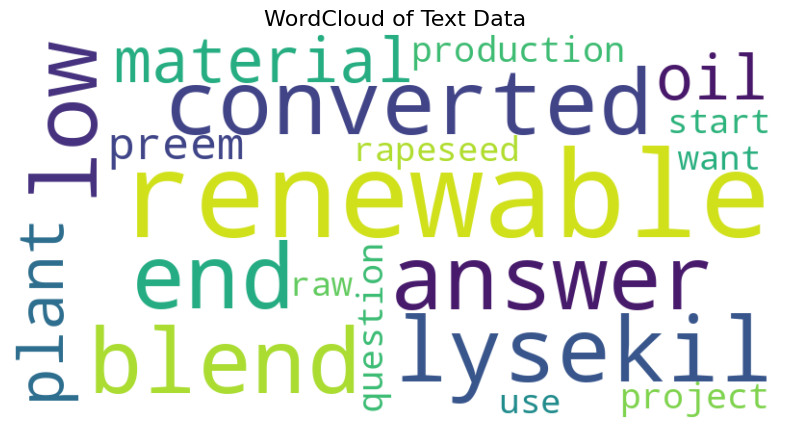

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(preem_sentences)

# Create a DataFrame for transparency
df_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_count.sum())

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Text Data', fontsize=16)
plt.show()


1. **Initialize CountVectorizer:** Sets up `CountVectorizer` to convert text into a document-term matrix, removing English stopwords and converting all text to lowercase.

2. **Transform Sentences into Features:** Applies `CountVectorizer` to `preem_sentences`, creating a sparse matrix of token frequencies.

3. **Create a DataFrame for Transparency:** Converts the sparse matrix into a pandas DataFrame, where rows are documents, columns are terms, and cells are token frequencies.

4. **Generate WordCloud:** Creates a WordCloud visualization by summing token frequencies across all documents and using them as input for the WordCloud generator.

5. **Plot WordCloud:** Displays the WordCloud, showing the most frequent words in the dataset with proportional sizes based on their frequency.

# Token saliency with TF-IDF measure

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.matutils import sparse2full
import pandas as pd

# List of sentences from the sustainability communication dataset
sentences = preem_sentences  # + vattenfall_sentences

# Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in sentences]

# Create a Gensim dictionary
dictionary = Dictionary(tokenized_sentences)

# Create Bag of Words (BoW) representation
corpus = [dictionary.doc2bow(sentence) for sentence in tokenized_sentences]

# Create a TF-IDF model from the BoW corpus
tfidf_model = TfidfModel(corpus)

# Transform the corpus to TF-IDF weights
tfidf_corpus = [tfidf_model[doc] for doc in corpus]

# Convert TF-IDF weights to a dense document-term matrix
dt_matrix = pd.DataFrame(
    [sparse2full(doc, len(dictionary)) for doc in tfidf_corpus],
    columns=[dictionary[idx] for idx in range(len(dictionary))]
).T

# Set document identifiers as column names
dt_matrix.columns = [f"Sentence_{i+1}" for i in range(len(sentences))]

# Display the TF-IDF document-term matrix
dt_matrix


,Sentence_1,Sentence_2,Sentence_3
converted,0.441244,0.000000,0.000000
material,0.441244,0.000000,0.000000
plant,0.441244,0.000000,0.000000
raw,0.441244,0.000000,0.000000
renewable,0.162850,0.138158,0.000000
use,0.441244,0.000000,0.000000
blend,0.000000,0.374340,0.000000
end,0.000000,0.374340,0.000000
low,0.000000,0.374340,0.000000
oil,0.000000,0.374340,0.000000


1. **Import Libraries**: `gensim` for text processing and `pandas` for handling the document-term matrix.  
2. **Load Data**: `sentences` contains pre-processed text data.  
3. **Tokenize Sentences**: Splits each sentence into a list of words (`tokenized_sentences`).  
4. **Create Dictionary**: Maps unique tokens to IDs (`dictionary`).  
5. **BoW Representation**: Converts tokenized sentences into sparse vectors of token counts (`corpus`).  
6. **TF-IDF Model**: Calculates term frequency-inverse document frequency weights (`tfidf_model`).  
7. **Transform to TF-IDF**: Converts the corpus to TF-IDF weighted vectors (`tfidf_corpus`).  
8. **Dense Matrix**: Converts sparse vectors to a dense DataFrame with terms as rows and sentences as columns (`dt_matrix`).  
9. **Set Column Names**: Labels columns with sentence identifiers (`Sentence_{i+1}`).  
10. **Output Matrix**: Displays the final TF-IDF document-term matrix.

# Recreate texts from normalized tokens

In [ ]:
import pandas as pd

# Group the tokens back into sentences using token_lemma
grouped = df_tokens.groupby(['folder_name', 'text_index', 'sentence_index'])['token_lemma'].apply(' '.join).reset_index()

# Calculate the number of sentences per text
sentence_counts = grouped.groupby(['folder_name', 'text_index']).size().reset_index(name='sentence_count')

# Calculate the total number of tokens per text
grouped['token_count'] = grouped['token_lemma'].apply(lambda x: len(x.split()))
token_counts = grouped.groupby(['folder_name', 'text_index'])['token_count'].sum().reset_index()

# Concatenate all token_lemma values into a single text per text_index
grouped['lowercased_sentence'] = grouped['token_lemma'].apply(str.lower)
concatenated_texts = (
    grouped.groupby(['folder_name', 'text_index'])['lowercased_sentence']
    .apply(lambda x: ' '.join(x))
    .reset_index(name='concatenated_text')
)

# Merge sentence and token counts with concatenated texts
text_df = pd.merge(sentence_counts, token_counts, on=['folder_name', 'text_index'])
text_df = pd.merge(text_df, concatenated_texts, on=['folder_name', 'text_index'])

# Final DataFrame: folder_name, text_index, sentence_count, token_count, concatenated_text
text_df


,folder_name,text_index,sentence_count,token_count,concatenated_text
0,org1-preem,1,32,326,saf sustainable aviation fuels icr home we pro...
1,org1-preem,2,12,186,preem home sustainability raw materials raw ma...
2,org1-preem,3,27,343,carbon capture storage preem home we projects ...
3,org1-preem,4,52,462,production renewable diesel project preem home...
4,org1-preem,5,24,291,towards climate neutral value chain road clima...
5,org2-vattenfall,6,64,788,shift climate narrative vattenfall news sustai...
6,org2-vattenfall,7,53,721,un sustainable development goal vattenfall un ...
7,org2-vattenfall,8,33,443,vattenfall expand circular wind turbine compo ...
8,org2-vattenfall,9,53,601,fossil free fertiliser key cut carbon emission...


1. **Group Tokens into Sentences**: Combines `token_lemma` values for each sentence based on `folder_name`, `text_index`, and `sentence_index` (`grouped`).  
2. **Count Sentences per Text**: Calculates the number of sentences for each `folder_name` and `text_index` (`sentence_counts`).  
3. **Count Tokens per Text**: Computes the total number of tokens for each text by summing token counts in all sentences (`token_counts`).  
4. **Concatenate Tokens**: Joins all `lowercased_sentence` values for each `folder_name` and `text_index` into a single text string (`concatenated_texts`).  
5. **Merge DataFrames**: Combines sentence counts, token counts, and concatenated texts into a single DataFrame (`text_df`).  
6. **Output Final DataFrame**: Produces `text_df` containing `folder_name`, `text_index`, `sentence_count`, `token_count`, and `concatenated_text`.

# Wordcloud using all text data

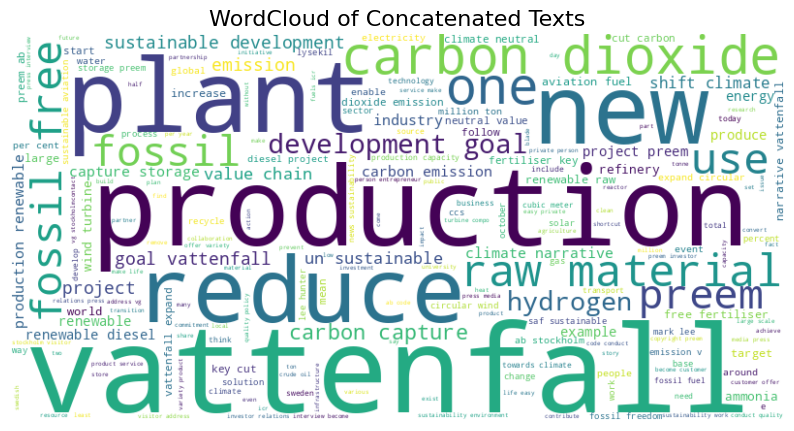

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text from the concatenated_text column
all_text = ' '.join(text_df['concatenated_text'])

# Create a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Concatenated Texts", fontsize=16)
plt.show()


# Topic modelling using all text data

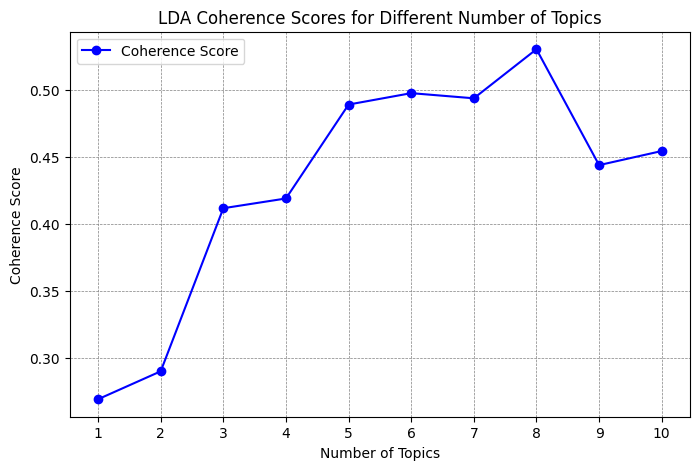

In [ ]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

# Tokenize the concatenated_text column
text_df['tokenized_text'] = text_df['concatenated_text'].apply(lambda x: x.split())

# Create a Gensim dictionary and corpus
dictionary = Dictionary(text_df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in text_df['tokenized_text']]

# Iterate over different values for num_topics and calculate coherence
coherence_scores = []
topic_range = range(1, 11)

for num_topics in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=text_df['tokenized_text'], dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence measures
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', color='blue', label='Coherence Score')
plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, axis='both')
plt.title('LDA Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.legend()
plt.show()


1. **Data Preparation**: The `concatenated_text` column is tokenized into lists of words (`tokenized_text`), which are then used to create a Gensim dictionary mapping unique words to integer IDs. A Bag of Words (BoW) representation of the dataset is generated (`corpus`), enabling further transformations for topic modeling.  

2. **Topic Modeling and Evaluation**: An LDA model is trained iteratively for different numbers of topics (`num_topics` ranging from 1 to 10). For each model, the coherence score is computed using `CoherenceModel`, which evaluates the quality and interpretability of the topics generated by the LDA model. These scores are stored for comparison.  

3. **Visualization**: The coherence scores are plotted against the number of topics in a line graph, where blue dots represent coherence values. Gray grid lines provide better visual alignment, and the graph helps identify the optimal number of topics by observing where coherence peaks.

In [ ]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer

# Split concatenated text into tokenized lists
text_df['tokenized_text'] = text_df['concatenated_text'].apply(lambda x: x.split())

# Create a Gensim dictionary and corpus
dictionary = Dictionary(text_df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in text_df['tokenized_text']]

# LDA Model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Display the top words in each topic
topics = lda_model.print_topics(num_words=10)
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}: {topic_words}")


Topic 0: 0.040*"vattenfall" + 0.023*"goal" + 0.019*"wind" + 0.018*"sustainable" + 0.014*"development" + 0.013*"un" + 0.011*"energy" + 0.011*"circular" + 0.010*"turbine" + 0.009*"industry"
Topic 1: 0.001*"fertiliser" + 0.001*"production" + 0.001*"fossil" + 0.001*"carbon" + 0.001*"free" + 0.001*"ammonia" + 0.001*"emission" + 0.001*"renewable" + 0.001*"vattenfall" + 0.001*"plant"
Topic 2: 0.034*"preem" + 0.032*"renewable" + 0.026*"production" + 0.019*"project" + 0.015*"raw" + 0.015*"diesel" + 0.014*"plant" + 0.012*"emission" + 0.012*"climate" + 0.012*"value"
Topic 3: 0.033*"carbon" + 0.021*"emission" + 0.021*"fossil" + 0.016*"capture" + 0.015*"preem" + 0.014*"fertiliser" + 0.013*"dioxide" + 0.012*"production" + 0.012*"storage" + 0.011*"free"
Topic 4: 0.028*"climate" + 0.018*"vattenfall" + 0.014*"shift" + 0.013*"narrative" + 0.010*"event" + 0.010*"people" + 0.008*"news" + 0.008*"journalism" + 0.007*"think" + 0.006*"we"


1. **Data Preparation**: The code begins by tokenizing the `concatenated_text` column in `text_df` into lists of words using the `split` method. These tokenized lists are then used to create a Gensim dictionary, which maps each unique word to an integer ID. A Bag of Words (BoW) corpus is constructed, representing each document as a sparse vector of word frequencies.  

2. **LDA Topic Modeling**: An LDA model is trained on the BoW corpus with a specified number of topics (`num_topics=5`). The `LdaModel` uses the word distributions in the corpus to identify latent topics, iterating through the data for 10 passes to optimize the model's performance.  

3. **Topic Inspection**: The trained LDA model is used to extract and display the top 10 words for each topic. These words, ranked by their contribution to the topic, provide insights into the themes present in the dataset. The topics are printed with their IDs and associated terms for interpretation.

In [ ]:
# Optionally, convert corpus to a matrix for CountVectorizer output
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_df['concatenated_text'])
count_vectorized_terms = vectorizer.get_feature_names_out()

# Optional: Save vectorized terms and corpus for further analysis
text_df['lda_topics'] = [lda_model.get_document_topics(bow) for bow in corpus]

# Example output for topics per document
text_df[['folder_name', 'text_index', 'lda_topics']]

,folder_name,text_index,lda_topics
0,org1-preem,1,"[(2, 0.13793616), (3, 0.8602214)]"
1,org1-preem,2,"[(0, 0.45019183), (2, 0.5465673)]"
2,org1-preem,3,"[(3, 0.9976478)]"
3,org1-preem,4,"[(2, 0.99825996)]"
4,org1-preem,5,"[(2, 0.9972284)]"
5,org2-vattenfall,6,"[(4, 0.9989753)]"
6,org2-vattenfall,7,"[(0, 0.99888015)]"
7,org2-vattenfall,8,"[(0, 0.99817926)]"
8,org2-vattenfall,9,"[(3, 0.99865377)]"


1. **Count Vectorization**: The `CountVectorizer` is used to transform the `concatenated_text` column into a document-term matrix (`X`), where each row represents a document, and each column corresponds to a unique term. The `get_feature_names_out` method extracts the list of terms (features) in the vocabulary.  

2. **Extract Topics for Documents**: For each document in the corpus, the trained LDA model's `get_document_topics` method is used to calculate the topic distribution, representing the relative importance of each topic within the document. These distributions are added to the DataFrame in a new column, `lda_topics`.  

3. **Output Results**: The DataFrame displays selected columns (`folder_name`, `text_index`, and `lda_topics`), showing the folder or organization, document ID, and the LDA-inferred topic distributions for further analysis or interpretation.

In [ ]:
!pip install pyLDAvis >/dev/null 2>&1


In [ ]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# Split concatenated text into tokenized lists
text_df['tokenized_text'] = text_df['concatenated_text'].apply(lambda x: x.split())

# Create a Gensim dictionary and corpus
dictionary = Dictionary(text_df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in text_df['tokenized_text']]

# LDA Model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Visualize the LDA model results using PyLDAvis
pyLDAvis.enable_notebook()  # Use this in Jupyter Notebook to render the visualization
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)  # Displays in Notebook


1. **Data Preparation**: The `concatenated_text` column in `text_df` is tokenized into lists of words (`tokenized_text`) using the `split` method. A Gensim dictionary is then created to map unique tokens to integer IDs, followed by the construction of a Bag of Words (BoW) corpus, which represents each document as a sparse vector of word frequencies.  

2. **LDA Topic Modeling**: An LDA model is trained on the BoW corpus to extract latent topics from the text. The model is configured to identify a specified number of topics (`num_topics=5`) and iterates 10 times over the corpus to refine topic distributions.  

3. **Visualization with PyLDAvis**: The trained LDA model, along with the corpus and dictionary, is passed to PyLDAvis for interactive visualization. This tool enables exploration of topics, their relationships, and associated terms, providing insights into the dataset's thematic structure. The visualization can be displayed directly within a Jupyter Notebook.

In PyLDAvis, **saliency** and **relevance** are two key metrics that help interpret topics in an LDA model. These metrics are used to rank and display terms associated with each topic in the visualization, providing insights into their importance and relationship to the topics.

---

### **Why These Metrics Are Useful**
1. **Saliency** helps identify the most meaningful terms across the entire corpus, ensuring the visualization highlights terms that are both frequent and discriminative.
2. **Relevance** allows users to explore the trade-off between commonly used terms and topic-specific terms, offering flexibility in interpreting the results.

### **How PyLDAvis Uses These Metrics**
- **Topic-Term Bar Charts**: Terms are ranked by relevance for a selected topic and displayed as bars.
- **Adjustable \(\lambda\)**: Users can interactively adjust \(\lambda\) to explore terms that are either more frequent or more exclusive to the topic.
- **Interactive Topic Exploration**: Clicking on a topic in the left panel highlights the most salient and relevant terms, facilitating deeper topic interpretation.


In [ ]:
pyLDAvis.save_html(lda_vis, 'lda_visualization.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
